In [2]:
import pandas as pd

In [5]:
dataset = pd.read_csv('spam_dataset.csv')
dataset.head()

,label,message
0,spam,Win a FREE iPhone now! Click the link to claim...
1,ham,"Hey, are we still on for dinner tonight?"
2,spam,Congratulations! You’ve won a $500 Amazon gift...
3,ham,Can you send me the meeting notes from yesterday?
4,spam,Exclusive offer! Get cheap loans with 0% inter...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    104 non-null    object
 1   message  104 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [8]:
dataset['label'].value_counts()

,count
label,
spam,52
ham,52


In [11]:
# Preprocess the Text
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text to numerical features
vectorize = TfidfVectorizer(stop_words='english')
x = vectorize.fit_transform(dataset['message'])
# Labels
y = dataset['label'].map({'ham':0, 'spam':1})


In [12]:
# Split Data into Training and Test Set

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)


In [14]:
# Train a Machine Learning Model

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)


In [16]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9047619047619048
Confusion Matrix:
 [[ 8  2]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.85      1.00      0.92        11

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



In [18]:
# Test Your Model on New Messages

# Example messages
new_messages = [
    "Congratulations! You won a free iPhone.",
    "Hey, are we meeting tomorrow?",
    "Win $1000 now by clicking this link!"
]

# Convert messages to features
new_features = vectorize.transform(new_messages)

# Predict
predictions = model.predict(new_features)

for msg, pred in zip(new_messages, predictions):
    label = 'Spam' if pred == 1 else 'Ham'
    print(f"Message: {msg}\nPredicted: {label}\n")


Message: Congratulations! You won a free iPhone.
Predicted: Spam

Message: Hey, are we meeting tomorrow?
Predicted: Ham

Message: Win $1000 now by clicking this link!
Predicted: Spam



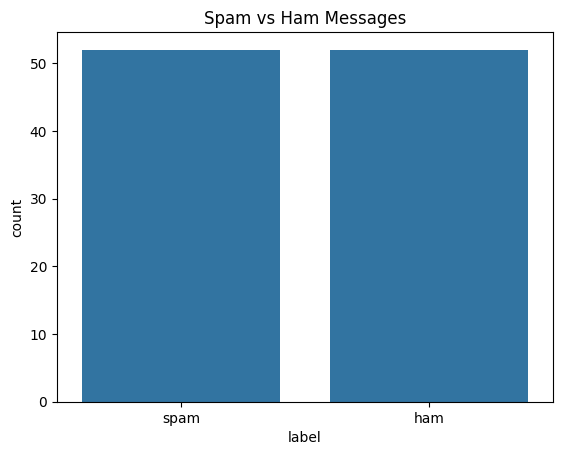

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of spam and ham
sns.countplot(x='label', data=dataset)  # ✅ use 'data=dataset'
plt.title("Spam vs Ham Messages")
plt.show()



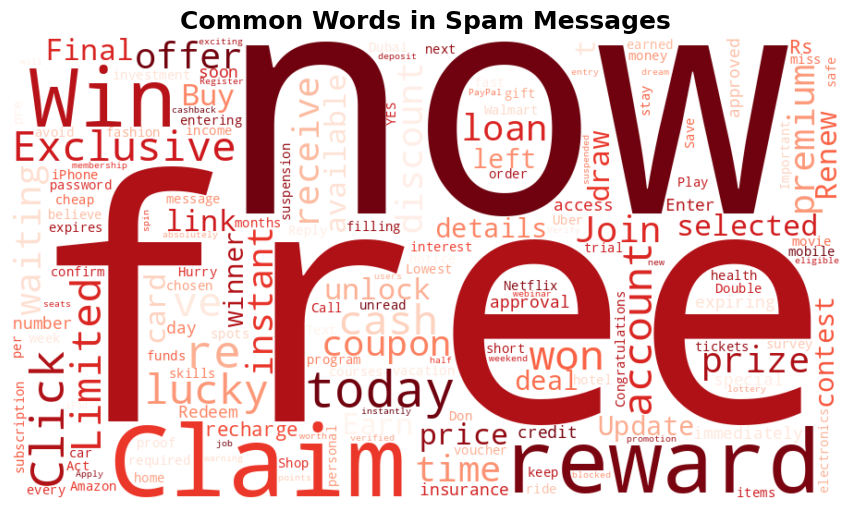

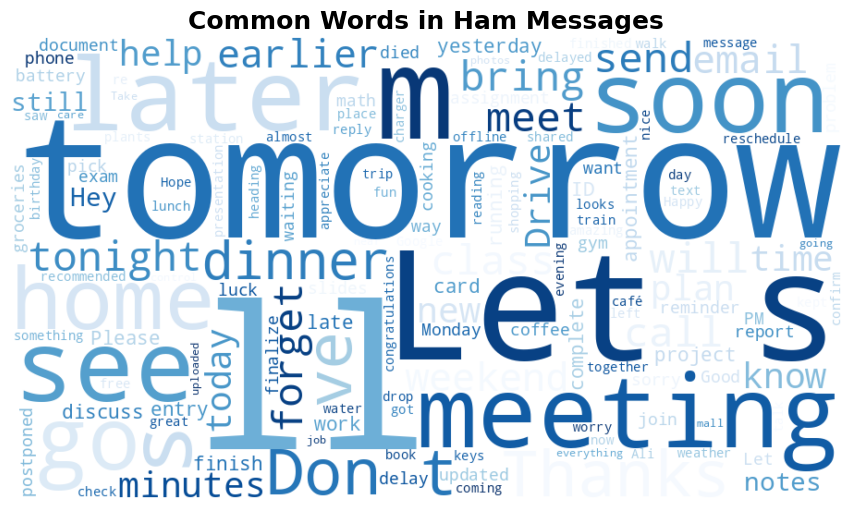

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Spam messages word cloud
spam_text = " ".join(dataset[dataset['label']=='spam']['message'])
spam_wc = WordCloud(width=900, height=500, background_color='white',
                    colormap='Reds', contour_width=3, contour_color='black').generate(spam_text)

plt.figure(figsize=(12,6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Spam Messages", fontsize=18, fontweight='bold')
plt.show()

# Ham messages word cloud
ham_text = " ".join(dataset[dataset['label']=='ham']['message'])
ham_wc = WordCloud(width=900, height=500, background_color='white',
                   colormap='Blues', contour_width=3, contour_color='black').generate(ham_text)

plt.figure(figsize=(12,6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Ham Messages", fontsize=18, fontweight='bold')
plt.show()


/tmp/ipython-input-4184248083.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_probs, y=top_words, palette="Reds_r")


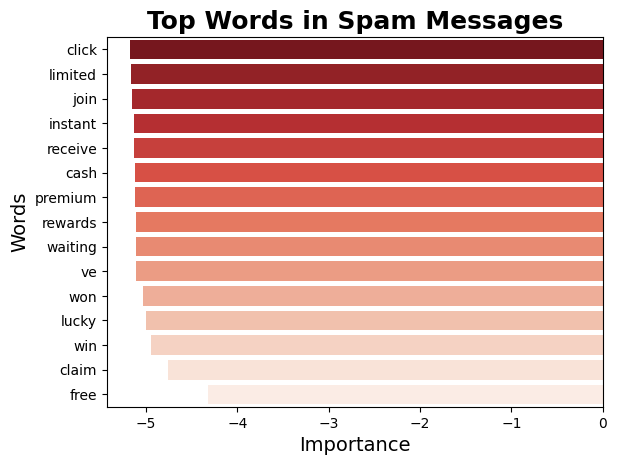

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature names from TF-IDF
feature_names = vectorize.get_feature_names_out()  #  use 'vectorize'

# Probabilities for spam class (MultinomialNB)
spam_probs = model.feature_log_prob_[1]

# Top 15 spam words
top_spam_idx = np.argsort(spam_probs)[-15:]
top_words = feature_names[top_spam_idx]
top_probs = spam_probs[top_spam_idx]

# Plot
sns.barplot(x=top_probs, y=top_words, palette="Reds_r")
plt.title("Top Words in Spam Messages", fontsize=18, fontweight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.show()
